In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/latest/latest.csv


In [60]:
## data Preprocess
# Bas import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.metrics import mean_squared_error

In [61]:
raasta = '../input/latest/latest.csv'
df = pd.read_csv(raasta)


In [62]:
df.head(7)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88
5,E0,12/08/2023,15:00,Sheffield United,Crystal Palace,0,1,A,0,0,...,1.53,0.25,2.10,1.83,2.10,1.84,2.12,1.86,2.05,1.83
6,E0,12/08/2023,17:30,Newcastle,Aston Villa,5,1,H,2,1,...,2.22,-0.75,1.84,2.09,1.85,2.09,1.87,2.13,1.82,2.06


In [63]:
# Create new rows that we will want to use later for future predictions.
new_rows = {
    'HomeTeam':['Brentford', 'Man City', 'Liverpool', 'Newcastle', 'Chelsea', 'Aston Villa'],
    'AwayTeam':['Man United', 'Arsenal', 'Brighton','West Ham', 'Burnley', 'Wolves'],
    'Year' : [2024]*6,
    'Month' : [3]*6,
    'Day' : [30, 31, 31, 30, 30, 30],
    'Hour': [20, 16, 14, 12, 15, 25],
    'Min':[00, 30, 00, 30, 00, 00]
}

In [64]:
df = df[df.columns[:24]].copy()
df.loc[:,'Day'] = (df['Date'].apply(lambda x:x.split('/')[0])).astype(int)
df.loc[:,'Month'] = (df['Date'].apply(lambda x:x.split('/')[1])).astype(int)
df.loc[:,'Year'] = (df['Date'].apply(lambda x:x.split('/')[2])).astype(int)
df.loc[:,'Hour'] = (df['Time'].apply(lambda x:x.split(":")[0])).astype(int)
df.loc[:,'Min'] = (df['Time'].apply(lambda x:x.split(":")[1])).astype(int)
df = df.drop(columns = ['Date', 'Time'])
df = pd.concat([pd.DataFrame(new_rows), df], ignore_index=True)
df = df.sort_values(by= ['Year', 'Month', 'Day', 'Hour']).reset_index(drop = True)
df

,HomeTeam,AwayTeam,Year,Month,Day,Hour,Min,Div,FTHG,FTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Burnley,Man City,2023,8,11,20,0,E0,0.0,3.0,...,1.0,8.0,11.0,8.0,6.0,5.0,0.0,0.0,1.0,0.0
1,Arsenal,Nott'm Forest,2023,8,12,12,30,E0,2.0,1.0,...,7.0,2.0,12.0,12.0,8.0,3.0,2.0,2.0,0.0,0.0
2,Bournemouth,West Ham,2023,8,12,15,0,E0,1.0,1.0,...,5.0,3.0,9.0,14.0,10.0,4.0,1.0,4.0,0.0,0.0
3,Brighton,Luton,2023,8,12,15,0,E0,4.0,1.0,...,12.0,3.0,11.0,12.0,6.0,7.0,2.0,2.0,0.0,0.0
4,Everton,Fulham,2023,8,12,15,0,E0,0.0,1.0,...,9.0,2.0,12.0,6.0,10.0,4.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Chelsea,Burnley,2024,3,30,15,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,Brentford,Man United,2024,3,30,20,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,Aston Villa,Wolves,2024,3,30,25,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,Liverpool,Brighton,2024,3,31,14,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df['HomeTeam'].value_counts().sort_index()


HomeTeam
Arsenal             14
Aston Villa         15
Bournemouth         14
Brentford           15
Brighton            14
Burnley             15
Chelsea             14
Crystal Palace      14
Everton             14
Fulham              15
Liverpool           15
Luton               15
Man City            15
Man United          14
Newcastle           15
Nott'm Forest       14
Sheffield United    14
Tottenham           14
West Ham            15
Wolves              14
Name: count, dtype: int64

In [66]:
df.sort_values(by= ['Year', 'Month', 'Day', 'Hour', 'Min'])


,HomeTeam,AwayTeam,Year,Month,Day,Hour,Min,Div,FTHG,FTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Burnley,Man City,2023,8,11,20,0,E0,0.0,3.0,...,1.0,8.0,11.0,8.0,6.0,5.0,0.0,0.0,1.0,0.0
1,Arsenal,Nott'm Forest,2023,8,12,12,30,E0,2.0,1.0,...,7.0,2.0,12.0,12.0,8.0,3.0,2.0,2.0,0.0,0.0
2,Bournemouth,West Ham,2023,8,12,15,0,E0,1.0,1.0,...,5.0,3.0,9.0,14.0,10.0,4.0,1.0,4.0,0.0,0.0
3,Brighton,Luton,2023,8,12,15,0,E0,4.0,1.0,...,12.0,3.0,11.0,12.0,6.0,7.0,2.0,2.0,0.0,0.0
4,Everton,Fulham,2023,8,12,15,0,E0,0.0,1.0,...,9.0,2.0,12.0,6.0,10.0,4.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Chelsea,Burnley,2024,3,30,15,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,Brentford,Man United,2024,3,30,20,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,Aston Villa,Wolves,2024,3,30,25,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,Liverpool,Brighton,2024,3,31,14,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# first part we need:
# 1. A row for each match, from the pespective of both the home and away team.
# 2. A column called team_playing
# 3. A column for opponent

df['team_playing'] = df['HomeTeam']
df['opponent'] = df['AwayTeam']

df2 = df.copy()
df2['team_playing'] = df2['AwayTeam']
df2['opponent'] = df2['HomeTeam']

In [68]:
# we need:
# Columns describing:
# 1. What the team_playing did. We will use these columns to compute rolling statistics of the team playing.
# 2. Columns describing what the opponent did? Yes because does that represent the team_playing, and how oppositions have done against them right?
#  

df = df[['team_playing', 'opponent', 'HomeTeam', 'AwayTeam', 'FTHG', 'HTHG', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR', 
        'Day', 'Month', 'Year', 'Hour',
        'FTAG', 'HTAG', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR', 'FTR', 'Referee']]

df2 = df2[['team_playing', 'opponent','HomeTeam', 'AwayTeam','FTAG', 'HTAG', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR', 
            'Day', 'Month', 'Year', 'Hour',
            'FTHG', 'HTHG', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR', 'FTR', 'Referee']]


# We have two datasets. Each containing a team_playing column. df is when the team_playing is the home team and df2 is when 
# the team playing is the away team.

# We need to convert these column names from home and way to team_playing stats and opponent stats.

In [69]:
df = df.rename(columns = {'FTHG':'FT_TP_G', # goals for the team playing
            'HTHG':'HT_TP_G', 
            'HS':'TP_S', 
            'HST':'TP_ST', 
            'HF':'TP_F',
            'HC': 'TP_C',
            'HY':'TP_Y', 
            'HR':'TP_R',
            'FTAG':'FT_OP_G', 
            'HTAG':'HT_OP_G', 
            'AS':'OP_S', 
            'AST':'OP_ST', 
            'AF':'OP_F',
            'AC': 'OP_C',
            'AY':'OP_Y', 
            'AR':'OP_R'})
df

,team_playing,opponent,HomeTeam,AwayTeam,FT_TP_G,HT_TP_G,TP_S,TP_ST,TP_F,TP_C,...,FT_OP_G,HT_OP_G,OP_S,OP_ST,OP_F,OP_C,OP_Y,OP_R,FTR,Referee
0,Burnley,Man City,Burnley,Man City,0.0,0.0,6.0,1.0,11.0,6.0,...,3.0,2.0,17.0,8.0,8.0,5.0,0.0,0.0,A,C Pawson
1,Arsenal,Nott'm Forest,Arsenal,Nott'm Forest,2.0,2.0,15.0,7.0,12.0,8.0,...,1.0,0.0,6.0,2.0,12.0,3.0,2.0,0.0,H,M Oliver
2,Bournemouth,West Ham,Bournemouth,West Ham,1.0,0.0,14.0,5.0,9.0,10.0,...,1.0,0.0,16.0,3.0,14.0,4.0,4.0,0.0,D,P Bankes
3,Brighton,Luton,Brighton,Luton,4.0,1.0,27.0,12.0,11.0,6.0,...,1.0,0.0,9.0,3.0,12.0,7.0,2.0,0.0,H,D Coote
4,Everton,Fulham,Everton,Fulham,0.0,0.0,19.0,9.0,12.0,10.0,...,1.0,0.0,9.0,2.0,6.0,4.0,2.0,0.0,A,S Attwell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Chelsea,Burnley,Chelsea,Burnley,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,Brentford,Man United,Brentford,Man United,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,Aston Villa,Wolves,Aston Villa,Wolves,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,Liverpool,Brighton,Liverpool,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df2 = df2.rename(columns = {'FTHG':'FT_OP_G',  # 
            'HTHG':'HT_OP_G', 
            'HS':'OP_S', 
            'HST':'OP_ST', 
            'HF':'OP_F',
            'HC': 'OP_C',
            'HY':'OP_Y', 
            'HR':'OP_R',
            'FTAG':'FT_TP_G', 
            'HTAG':'HT_TP_G', 
            'AS':'TP_S', 
            'AST':'TP_ST', 
            'AF':'TP_F',
            'AC': 'TP_C',
            'AY':'TP_Y', 
            'AR':'TP_R'})

df2

,team_playing,opponent,HomeTeam,AwayTeam,FT_TP_G,HT_TP_G,TP_S,TP_ST,TP_F,TP_C,...,FT_OP_G,HT_OP_G,OP_S,OP_ST,OP_F,OP_C,OP_Y,OP_R,FTR,Referee
0,Man City,Burnley,Burnley,Man City,3.0,2.0,17.0,8.0,8.0,5.0,...,0.0,0.0,6.0,1.0,11.0,6.0,0.0,1.0,A,C Pawson
1,Nott'm Forest,Arsenal,Arsenal,Nott'm Forest,1.0,0.0,6.0,2.0,12.0,3.0,...,2.0,2.0,15.0,7.0,12.0,8.0,2.0,0.0,H,M Oliver
2,West Ham,Bournemouth,Bournemouth,West Ham,1.0,0.0,16.0,3.0,14.0,4.0,...,1.0,0.0,14.0,5.0,9.0,10.0,1.0,0.0,D,P Bankes
3,Luton,Brighton,Brighton,Luton,1.0,0.0,9.0,3.0,12.0,7.0,...,4.0,1.0,27.0,12.0,11.0,6.0,2.0,0.0,H,D Coote
4,Fulham,Everton,Everton,Fulham,1.0,0.0,9.0,2.0,6.0,4.0,...,0.0,0.0,19.0,9.0,12.0,10.0,0.0,0.0,A,S Attwell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Burnley,Chelsea,Chelsea,Burnley,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,Man United,Brentford,Brentford,Man United,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,Wolves,Aston Villa,Aston Villa,Wolves,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,Brighton,Liverpool,Liverpool,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df_final = pd.concat([df, df2], ignore_index=True)
df_final = df_final.sort_values(by = ['Year', 'Month', 'Day', 'Hour', 'Referee']).reset_index(drop = True)
df_final

,team_playing,opponent,HomeTeam,AwayTeam,FT_TP_G,HT_TP_G,TP_S,TP_ST,TP_F,TP_C,...,FT_OP_G,HT_OP_G,OP_S,OP_ST,OP_F,OP_C,OP_Y,OP_R,FTR,Referee
0,Burnley,Man City,Burnley,Man City,0.0,0.0,6.0,1.0,11.0,6.0,...,3.0,2.0,17.0,8.0,8.0,5.0,0.0,0.0,A,C Pawson
1,Man City,Burnley,Burnley,Man City,3.0,2.0,17.0,8.0,8.0,5.0,...,0.0,0.0,6.0,1.0,11.0,6.0,0.0,1.0,A,C Pawson
2,Arsenal,Nott'm Forest,Arsenal,Nott'm Forest,2.0,2.0,15.0,7.0,12.0,8.0,...,1.0,0.0,6.0,2.0,12.0,3.0,2.0,0.0,H,M Oliver
3,Nott'm Forest,Arsenal,Arsenal,Nott'm Forest,1.0,0.0,6.0,2.0,12.0,3.0,...,2.0,2.0,15.0,7.0,12.0,8.0,2.0,0.0,H,M Oliver
4,Brighton,Luton,Brighton,Luton,4.0,1.0,27.0,12.0,11.0,6.0,...,1.0,0.0,9.0,3.0,12.0,7.0,2.0,0.0,H,D Coote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,Wolves,Aston Villa,Aston Villa,Wolves,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,Liverpool,Brighton,Liverpool,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575,Brighton,Liverpool,Liverpool,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,Man City,Arsenal,Man City,Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# create is_home feature.

df_final['is_home'] = (df_final['team_playing'] == df_final['HomeTeam']).astype(int)
df_final


,team_playing,opponent,HomeTeam,AwayTeam,FT_TP_G,HT_TP_G,TP_S,TP_ST,TP_F,TP_C,...,HT_OP_G,OP_S,OP_ST,OP_F,OP_C,OP_Y,OP_R,FTR,Referee,is_home
0,Burnley,Man City,Burnley,Man City,0.0,0.0,6.0,1.0,11.0,6.0,...,2.0,17.0,8.0,8.0,5.0,0.0,0.0,A,C Pawson,1
1,Man City,Burnley,Burnley,Man City,3.0,2.0,17.0,8.0,8.0,5.0,...,0.0,6.0,1.0,11.0,6.0,0.0,1.0,A,C Pawson,0
2,Arsenal,Nott'm Forest,Arsenal,Nott'm Forest,2.0,2.0,15.0,7.0,12.0,8.0,...,0.0,6.0,2.0,12.0,3.0,2.0,0.0,H,M Oliver,1
3,Nott'm Forest,Arsenal,Arsenal,Nott'm Forest,1.0,0.0,6.0,2.0,12.0,3.0,...,2.0,15.0,7.0,12.0,8.0,2.0,0.0,H,M Oliver,0
4,Brighton,Luton,Brighton,Luton,4.0,1.0,27.0,12.0,11.0,6.0,...,0.0,9.0,3.0,12.0,7.0,2.0,0.0,H,D Coote,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,Wolves,Aston Villa,Aston Villa,Wolves,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
574,Liverpool,Brighton,Liverpool,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
575,Brighton,Liverpool,Liverpool,Brighton,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
576,Man City,Arsenal,Man City,Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [73]:
rename_columns = {
    'FT_TP_G': 'team_playing_ft_goals',  # Full-Time Goals by Team Playing
    'HT_TP_G': 'team_playing_ht_goals',  # Half-Time Goals by Team Playing
    'TP_S': 'team_playing_total_shots',  # Total Shots by Team Playing
    'TP_ST': 'team_playing_shots_on_target',  # Shots on Target by Team Playing
    'TP_F': 'team_playing_fouls_committed',  # Fouls Committed by Team Playing
    'TP_C': 'team_playing_corners_won',  # Corners Won by Team Playing
    'TP_Y': 'team_playing_yellow_cards',  # Yellow Cards Received by Team Playing
    'TP_R': 'team_playing_red_cards',  # Red Cards Received by Team Playing
    'FT_OP_G': 'opponent_ft_goals',  # Full-Time Goals by Opponent (Goals Conceded by Team Playing)
    'HT_OP_G': 'opponent_ht_goals',  # Half-Time Goals by Opponent
    'OP_S': 'opponent_total_shots',  # Total Shots by Opponent
    'OP_ST': 'opponent_shots_on_target',  # Shots on Target by Opponent
    'OP_F': 'opponent_fouls_committed',  # Fouls Committed by Opponent (Fouls Won by Team Playing)
    'OP_C': 'opponent_corners_won',  # Corners Won by Opponent
    'OP_Y': 'opponent_yellow_cards',  # Yellow Cards Received by Opponent
    'OP_R': 'opponent_red_cards',  # Red Cards Received by Opponent
}


df_final = df_final.rename(columns=rename_columns)#.drop(columns = ['opponent_yellow_cards', 'opponent_red_cards', 'team_playing_yellow_cards', 'team_playing_red_cards', 'opponent_ht_goals', 'team_playing_ht_goals'])

In [74]:
df_final['target'] = ((((df_final['is_home']==1) & (df_final['FTR']=='H')) | ((df_final['is_home']==0) & (df_final['FTR']=='A')))).astype(int)
df_final.head(7)

,team_playing,opponent,HomeTeam,AwayTeam,team_playing_ft_goals,team_playing_ht_goals,team_playing_total_shots,team_playing_shots_on_target,team_playing_fouls_committed,team_playing_corners_won,...,opponent_total_shots,opponent_shots_on_target,opponent_fouls_committed,opponent_corners_won,opponent_yellow_cards,opponent_red_cards,FTR,Referee,is_home,target
0,Burnley,Man City,Burnley,Man City,0.0,0.0,6.0,1.0,11.0,6.0,...,17.0,8.0,8.0,5.0,0.0,0.0,A,C Pawson,1,0
1,Man City,Burnley,Burnley,Man City,3.0,2.0,17.0,8.0,8.0,5.0,...,6.0,1.0,11.0,6.0,0.0,1.0,A,C Pawson,0,1
2,Arsenal,Nott'm Forest,Arsenal,Nott'm Forest,2.0,2.0,15.0,7.0,12.0,8.0,...,6.0,2.0,12.0,3.0,2.0,0.0,H,M Oliver,1,1
3,Nott'm Forest,Arsenal,Arsenal,Nott'm Forest,1.0,0.0,6.0,2.0,12.0,3.0,...,15.0,7.0,12.0,8.0,2.0,0.0,H,M Oliver,0,0
4,Brighton,Luton,Brighton,Luton,4.0,1.0,27.0,12.0,11.0,6.0,...,9.0,3.0,12.0,7.0,2.0,0.0,H,D Coote,1,1
5,Luton,Brighton,Brighton,Luton,1.0,0.0,9.0,3.0,12.0,7.0,...,27.0,12.0,11.0,6.0,2.0,0.0,H,D Coote,0,0
6,Sheffield United,Crystal Palace,Sheffield United,Crystal Palace,0.0,0.0,8.0,1.0,18.0,5.0,...,24.0,8.0,11.0,5.0,0.0,0.0,A,J Brooks,1,0


In [75]:
df_grouped = df_final.groupby('team_playing')

In [76]:
cols_to_drop = ['AwayTeam', 'FTR', 'HomeTeam', 'Referee', 'opponent', 'team_playing', 'Day', 'Month', 'Year', 'Hour', 'is_home']

window = 5
data = []

for name, group in df_grouped:
    print(name)
    group.sort_values(by = ['Year', 'Month', 'Day', 'Hour', 'Referee']).reset_index(drop = True, inplace=True)
    mean_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').mean().add_suffix('_rolling_mean')
    sum_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').sum().add_suffix('_rolling_sum')
    
    std_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').std().add_suffix('_rolling_std')
    min_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').min().add_suffix('_rolling_min')
    max_ = group.drop(columns =cols_to_drop).rolling(window = window, closed = 'left').max().add_suffix('_rolling_max')
    median_ = group.drop(columns=cols_to_drop).rolling(window=window, closed='left').median().add_suffix('_rolling_median')
    
    

    d = pd.concat([group[['team_playing', 'opponent', 'is_home', 'target', 'Year', 'Month', 'Day', 'Hour', 'Referee']], 
                   mean_,                
                    #sum_, 
                   # std_, 
                    #min_, 
                    #max_, 
                   #median_, 
                   ], axis = 1).bfill()
    data.append(d)


Arsenal
Aston Villa
Bournemouth
Brentford
Brighton
Burnley
Chelsea
Crystal Palace
Everton
Fulham
Liverpool
Luton
Man City
Man United
Newcastle
Nott'm Forest
Sheffield United
Tottenham
West Ham
Wolves


In [77]:
final_data = pd.concat(data).sort_index()


In [78]:
final_data['Date'] = pd.to_datetime(final_data[['Year', 'Month', 'Day', 'Hour']])
final_data.sort_values(by = ['Date', 'Referee'], inplace = True)

In [79]:
final_data = final_data.sort_values(by = ['Year', 'Month', 'Day', 'Hour', 'Referee']).reset_index(drop = True)

In [80]:
final_data.shape


(578, 27)

In [81]:
train_df = final_data[final_data['Date']<=pd.Timestamp('2024-03-01')]
test_df = final_data[(final_data['Date'] > pd.Timestamp('2024-03-01')) & (final_data['Date'] <= pd.Timestamp('2024-03-29'))]
future_prediction = final_data[final_data['Date']>=pd.Timestamp('2024-03-20')]

print(train_df.shape)
print(test_df.shape)
print(future_prediction.shape)

(516, 27)
(50, 27)
(12, 27)


In [82]:
train_df.to_csv('train.csv',index = False)
test_df.to_csv( 'test.csv',index = False)
future_prediction.to_csv( 'future_prediction.csv',index = False)
final_data.to_csv('final_data.csv',index = False)

In [83]:
train_df.drop(columns=['Day', 'Month', 'Year', 'Hour', 'Date']).columns


Index(['team_playing', 'opponent', 'is_home', 'target', 'Referee',
       'team_playing_ft_goals_rolling_mean',
       'team_playing_ht_goals_rolling_mean',
       'team_playing_total_shots_rolling_mean',
       'team_playing_shots_on_target_rolling_mean',
       'team_playing_fouls_committed_rolling_mean',
       'team_playing_corners_won_rolling_mean',
       'team_playing_yellow_cards_rolling_mean',
       'team_playing_red_cards_rolling_mean', 'opponent_ft_goals_rolling_mean',
       'opponent_ht_goals_rolling_mean', 'opponent_total_shots_rolling_mean',
       'opponent_shots_on_target_rolling_mean',
       'opponent_fouls_committed_rolling_mean',
       'opponent_corners_won_rolling_mean',
       'opponent_yellow_cards_rolling_mean', 'opponent_red_cards_rolling_mean',
       'target_rolling_mean'],
      dtype='object')

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_with_const = add_constant(train_df.drop(columns=['Day', 'Month', 'Year', 'Hour', 'Date', 'target', 'team_playing', 'opponent', 'Referee']))

vif = pd.DataFrame()
vif["Variable"] = df_with_const.columns
vif["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

vif[vif['VIF']<5]['Variable'].values.tolist()

['is_home',
 'team_playing_ht_goals_rolling_mean',
 'team_playing_total_shots_rolling_mean',
 'team_playing_fouls_committed_rolling_mean',
 'team_playing_corners_won_rolling_mean',
 'team_playing_yellow_cards_rolling_mean',
 'team_playing_red_cards_rolling_mean',
 'opponent_ft_goals_rolling_mean',
 'opponent_ht_goals_rolling_mean',
 'opponent_fouls_committed_rolling_mean',
 'opponent_corners_won_rolling_mean',
 'opponent_yellow_cards_rolling_mean',
 'opponent_red_cards_rolling_mean',
 'target_rolling_mean']

In [85]:
features = ['is_home', # If the team playing is home or not.
            'team_playing_ft_goals_rolling_mean', # full time goals rolling averages
            'team_playing_total_shots_rolling_mean', # rolling averages of total shots taken.
            'team_playing_corners_won_rolling_mean', # rolling averages of total corners won.
            'target_rolling_mean', # rolling averages of prev results.
            'opponent_fouls_committed_rolling_mean' # rolling averages of number of fouls won.
            ]

X_train = train_df[features]
y_train = train_df['target']

X_test = test_df[features]
y_test = test_df['target']

X_future = future_prediction[features]



X_train.to_csv('train.csv', index = False)
y_train.to_csv('y_train.csv', index = False)

X_test.to_csv('X_test.csv', index = False)
y_test.to_csv('y_test.csv', index = False)

X_future.to_csv('X_future.csv', index = False)


In [86]:
test_df.drop(columns = ['Year', 'Month', 'Day', 'Hour', 'Referee']).reset_index(drop = True)[['team_playing', 'opponent']+features]


,team_playing,opponent,is_home,team_playing_ft_goals_rolling_mean,team_playing_total_shots_rolling_mean,team_playing_corners_won_rolling_mean,target_rolling_mean,opponent_fouls_committed_rolling_mean
0,Everton,West Ham,1,0.8,13.0,4.2,0.0,9.4
1,West Ham,Everton,0,1.0,12.6,3.0,0.2,10.8
2,Tottenham,Crystal Palace,1,2.0,15.0,8.4,0.4,11.4
3,Crystal Palace,Tottenham,0,1.8,11.4,6.4,0.4,10.8
4,Brentford,Chelsea,1,1.2,10.6,4.2,0.2,10.0
5,Chelsea,Brentford,0,1.6,11.8,5.0,0.4,11.2
6,Nott'm Forest,Liverpool,1,1.6,11.8,3.8,0.2,10.8
7,Liverpool,Nott'm Forest,0,3.2,21.4,8.0,0.8,11.6
8,Fulham,Brighton,1,1.6,15.8,8.4,0.4,9.4
9,Brighton,Fulham,0,2.2,15.0,6.8,0.4,11.6


In [87]:
## DataPreprocessing is Over


In [88]:
x_train = pd.read_csv('train.csv')
x_train

,is_home,team_playing_ft_goals_rolling_mean,team_playing_total_shots_rolling_mean,team_playing_corners_won_rolling_mean,target_rolling_mean,opponent_fouls_committed_rolling_mean
0,1,0.8,10.6,6.0,0.0,11.2
1,0,2.8,19.4,7.0,1.0,10.4
2,1,1.8,15.6,9.4,0.8,10.0
3,0,1.4,10.4,3.4,0.4,10.8
4,1,3.0,18.6,6.4,0.8,12.0
...,...,...,...,...,...,...
511,0,2.8,13.8,5.2,0.4,13.6
512,1,1.8,13.4,3.6,0.4,10.4
513,0,1.4,10.6,2.8,0.2,7.4
514,1,0.6,12.4,3.0,0.0,11.2


In [89]:
x_train.shape


(516, 6)

In [90]:
y_train = pd.read_csv('y_train.csv')


In [91]:
y_train.shape


(516, 1)

Therefore number of training examples is 516 and number of features available are 6

In [92]:
x_test = pd.read_csv('X_test.csv')


In [93]:
x_test.shape


(50, 6)

Number of test examples is 50

In [94]:
y_test = pd.read_csv('y_test.csv')


In [95]:
y_test.shape


(50, 1)

In [96]:


x_fut = pd.read_csv('X_future.csv')

In [97]:
x_fut.shape


(12, 6)

In [98]:
import numpy as np
import pandas as pd
import pymc as pm
from scipy.special import expit as logistic
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# 1. Logistic Regression with Scikit-learn (Prior estimation for Bayesian model)

## Changing shape of y_train as it takes only 1d array
y_train = np.array(y_train)
y_train = y_train.reshape(-1)
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
print("Logistic Regression Summary")
print(f"Coefficients: {logit_model.coef_}")

Logistic Regression Summary
Coefficients: [[ 0.57889984  0.23850269  0.141807    0.00912954  0.6279933  -0.08920316]]


In [100]:
print(x_train.shape, y_train.shape)


(516, 6) (516,)


In [101]:
# 2. Bayesian Logistic Regression Model using PyMC
with pm.Model() as model:
    # Define priors
    beta = pm.Normal('beta', mu=0, sigma=1, size=x_train.shape[1])
    
    # Linear combination
    eta = pm.math.dot(x_train, beta)
    
    # Define likelihood
    p = pm.Deterministic('p', pm.math.sigmoid(eta))
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y_train)

    # Sampling from posterior
    trace = pm.sample(2000, tune=1000, cores=2)

Output()

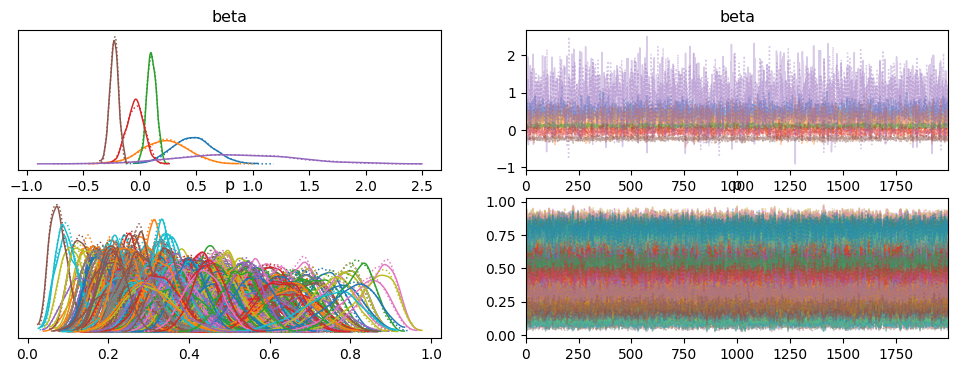

In [102]:
# 3. Posterior Diagnostics
pm.plot_trace(trace)
plt.show()

In [103]:
# 4. Posterior Summaries
summary = pm.summary(trace)
print(summary)


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]  0.467  0.178   0.135    0.807      0.003    0.002    3422.0   
beta[1]  0.227  0.203  -0.134    0.630      0.004    0.003    3055.0   
beta[2]  0.104  0.042   0.030    0.187      0.001    0.001    2685.0   
beta[3] -0.039  0.078  -0.192    0.098      0.001    0.001    2925.0   
beta[4]  0.852  0.509  -0.119    1.806      0.010    0.007    2740.0   
...        ...    ...     ...      ...        ...      ...       ...   
p[511]   0.296  0.058   0.186    0.400      0.001    0.001    3367.0   
p[512]   0.526  0.046   0.438    0.614      0.001    0.001    3234.0   
p[513]   0.450  0.040   0.374    0.526      0.001    0.001    3154.0   
p[514]   0.319  0.054   0.220    0.426      0.001    0.001    3488.0   
p[515]   0.211  0.032   0.153    0.272      0.001    0.000    3286.0   

         ess_tail  r_hat  
beta[0]    2593.0    1.0  
beta[1]    2638.0    1.0  
beta[2]    2309.0    1.0  
beta[3]    2042.0    1.0  


In [104]:
# 5. Test Set Predictions
posterior_means = np.mean(trace.posterior['beta'].values, axis=(0, 1))
eta_test = np.dot(X_test, posterior_means)
p_pred = logistic(eta_test)
y_pred = (p_pred > 0.5).astype(int)

In [105]:
## Just for checking
len(p_pred)
print(p_pred.shape, len(p_pred))

(50,) 50


In [106]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [107]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.66
Precision: 0.5294117647058824
Recall: 0.5
F1 Score: 0.5142857142857143


In [109]:
# 6. Visualization of Predicted Probabilities


team_a = 'Fulham'
team_b = 'Tottenham'

# Determine the number of predictions available
num_predictions = len(p_pred)

# Divide predictions equally between teams
half = num_predictions // 2

predictions_df = pd.DataFrame({
    'PredictedProbability': np.concatenate([p_pred[:half], p_pred[half:num_predictions]]),
    'Team': [team_a]*half + [team_b]*(num_predictions - half)
})

# predictions_df = pd.DataFrame({
#     'PredictedProbability': np.concatenate([p_pred[:10], p_pred[10:]]),
#     'Team': [team_a]*10 + [team_b]*10
# })

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


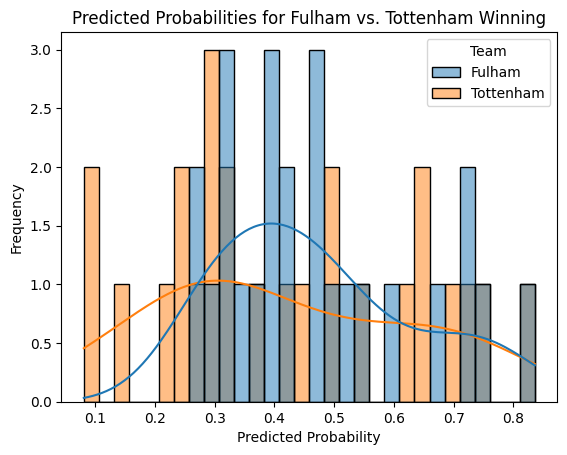

In [110]:
sns.histplot(data=predictions_df, x='PredictedProbability', hue='Team', bins=30, kde=True, alpha=0.5)
plt.title(f"Predicted Probabilities for {team_a} vs. {team_b} Winning")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

In [111]:
# 7. Future Predictions
eta_future = np.dot(X_future, posterior_means)
p_pred_future = logistic(eta_future)
future_predictions = (p_pred_future > 0.5).astype(int)
print("Future Predictions:", future_predictions)


Future Predictions: [0 0 1 0 0 1 0 1 1 0 1 1]


In [112]:
x_fut

,is_home,team_playing_ft_goals_rolling_mean,team_playing_total_shots_rolling_mean,team_playing_corners_won_rolling_mean,target_rolling_mean,opponent_fouls_committed_rolling_mean
0,1,2.2,10.4,3.0,0.4,13.8
1,0,2.0,14.8,4.0,0.4,12.2
2,1,2.2,13.4,4.8,0.4,9.8
3,0,0.8,11.6,4.6,0.2,11.4
4,1,1.2,10.4,3.2,0.0,9.8
5,0,1.6,15.4,6.2,0.6,8.6
6,1,2.0,12.6,6.8,0.6,12.6
7,0,1.0,12.4,4.8,0.6,8.0
8,1,2.6,22.0,9.4,0.8,10.4
9,0,1.6,15.6,7.8,0.4,12.2


In [113]:
future_predictions

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1])